In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
import time
from tqdm import tqdm
from heapq import *
from scipy.spatial.distance import cityblock
import seaborn as sns
import random as randm

In [3]:
#Generating maze
def generate_maze(dimension, prob, show_fig = False):
    maze = np.ones((dimension, dimension))
    for i in range(dimension):
        for j in range(dimension):
            if np.random.random() <= prob:
                maze[i,j] = 0

    
    maze[0,0] = 1
    maze[dimension-1, dimension-1] = 1
    fire=True
    #selecting one random point with burning cell
    while(fire):
        i=randm.randrange(0,dimension-1)
        j=randm.randrange(0,dimension-1)
        if(maze[i][j]!=0):
            maze[i][j]=3
            fire=False
    if show_fig:
            fig, ax = plt.subplots(figsize=(10,6))
            plt.grid(True)
            sns.heatmap(maze, ax=ax,vmin=0,annot= True, cmap=['black','white','Orange'], cbar=True)
            title = 'Dimensions:{} | P:{}'.format(dimension, prob)
            ax.set_title(title, fontsize=15)
            plt.savefig('maze.png')
            plt.show()
    return maze, prob

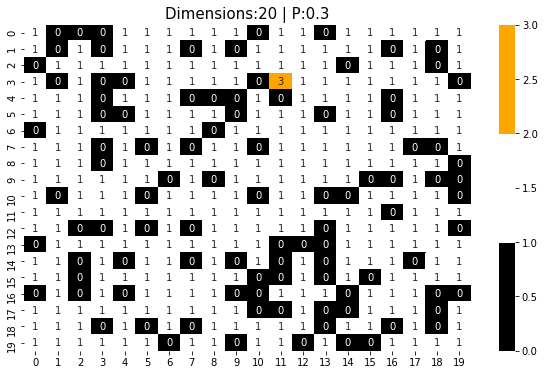

In [5]:
maze,p = generate_maze(20, 0.3,show_fig = True)

In [6]:
# geting one or zero to add to total burning neighbors 
def burning_neighbours(row,col,maze):
    if(0<=row<=len(maze)-1 and 0<=col<=len(maze)-1 and maze[row][col]==3):
        return 1
    return 0

In [7]:
#Updating fire in maze with probability 1-(1-q)^k
# q is the flammability anf k is total burning neighbors
def fire_update(maze,q):
    temp_maze=maze.copy()
    rd=[-1,1,0,0]
    cd=[0,0,-1,1]
    for i in range(len(maze)-1):
        for j in range(len(maze)-1):
                
            if(temp_maze[i][j]==0 or temp_maze[i][j]==1):
                total_burning_neighbours=0
                for k in range(4):
                    total_burning_neighbours+=burning_neighbours(i+rd[k],j+cd[k],temp_maze)
                if(total_burning_neighbours>0):
                    prob_fire=1-pow((1-q),total_burning_neighbours)
                    if(randm.uniform(0,1)<=prob_fire):
                            maze[i][j] = 3
    return maze

In [8]:
maze,p = generate_maze(20, 0.3,show_fig = False)
for i in range(1,11):
    maze =fire_update(maze,0.9)
print(maze)

[[1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 3. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 3. 3. 3. 3. 3. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 1. 0. 1. 0. 1.

In [9]:
#plotting maze

def plot_search_maze(maze, algo, p):
    if 1 in maze:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.heatmap(maze,annot=True, ax=ax, cmap=["red","blue","black","white","orange"],cbar=True)
        title = '{} | Dimension:{} | p:{}'.format(algo, maze.shape[0], p)
        ax.set_title(title, fontsize=15)
        plt.savefig(algo+'.png')
        plt.show()
    else:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.heatmap(maze,annot=True, ax=ax, cmap=["red","blue","black","orange"], cbar=True)
        title = '{} | Dimension:{} | P:{}'.format(algo, maze.shape[0], p)
        ax.set_title(title, fontsize=15)
        plt.savefig(algo+'.png')
        plt.show()

In [10]:
#getting neighbours of the current node
def get_neighbors(maze, curr_node, visited):
    i,j = curr_node
    
    neighbors = []
    if j+1 < len(maze):
        right = (i,j+1)
      
        if (maze[right]) and right not in visited and maze[right] != 3 and maze[right] != 0:
             neighbors.append(right)
    if i+1 < len(maze):
        bottom = (i+1,j)
        
        if (maze[bottom]) and bottom not in visited and maze[bottom] != 3 and maze[bottom] != 0:
            neighbors.append(bottom)
    
    if i-1 >= 0:
        up = (i-1,j)
       
        if (maze[up]) and up not in visited and maze[up] != 3 and maze[up] != 0:
            neighbors.append(up)
        
    if j-1 >= 0:
        left = (i,j-1)
     
        if (maze[left]) and left not in visited and maze[left] != 3 and maze[left] != 0:
            neighbors.append(left)
    
    return neighbors      

In [11]:
#Driver code for DFS just to compare (stratergy 1 and 2 will be using bfs)
def run_dfs(maze,p,show_fig = False):
    import time
    start = time.time()
    dfs_maze = maze.copy()
    sucess=0
    stack = []
    visited = set()
    curr_node = None
    max_fringe = 1
    parent = {}
    source = (0,0)
    goal = (dfs_maze.shape[0]-1, dfs_maze.shape[1]-1)
    path = []
    stack.append(source)
    while len(stack):
        curr_node = stack[-1]
        if curr_node not in visited and curr_node!=3:
            visited.add(curr_node)
            dfs_maze[curr_node] = -1
            #dfs_maze=fire_spread(maze,q)
        if curr_node == goal:
            time_taken = time.time() - start
            node = goal
            while node != source:
                dfs_maze=fire_update(dfs_maze,0.9)
                path.insert(0,node)
                dfs_maze[node] = -2
                node = parent[node]
            path.insert(0,source)
            dfs_maze[source] = -2
            
            if show_fig:
                
                
                #sucess+=1
                print('Path exists')    
                plot_search_maze(dfs_maze,'Depth First Search', p)
                    
            return 1, visited, path, time_taken
            
        neighbors = get_neighbors(dfs_maze, curr_node, visited)
    
        if len(neighbors) == 0:
            stack.pop()
               
        else:
            success=0
            stack.pop()
            for neighbor in reversed(neighbors):
                if neighbor not in parent:
                    parent[neighbor] = curr_node
                    stack.append(neighbor)
            
        if max_fringe < len(stack):
            max_fringe = len(stack)
    if show_fig:
        print('Path does not exist')
    time_taken = time.time() - start
    return 0, visited, [], time_taken,

In [14]:
#Driver code for BFS 
def run_bfs(maze,p, show_fig=False):
        start = time.time()
        bfs_maze = maze.copy()
      
        queue = deque([])
        path = []
        visited = set()
        parent = {}
        curr_node = None
        max_fringe = 1
        source = (0,0)
        goal = (bfs_maze.shape[0]-1, bfs_maze.shape[1]-1)
    
        queue.append(source)
        
    
        while len(queue):
            
            curr_node = queue.popleft()
            
            if curr_node not in visited:
                visited.add(curr_node)
                bfs_maze[curr_node] = -1
            
            if curr_node == goal and bfs_maze[curr_node]!=3:
                
                          
                time_taken = time.time() - start
                node = goal
                while node != source:
                    bfs_maze=fire_update(bfs_maze,0.5)
                   
                    path.insert(0,node)
                    if bfs_maze[node]==3:
                        bfs_maze[node]=6
                    else:
                        bfs_maze[node] = -2
                    
                    
                    node = parent[node]
                path.insert(0,source)
                bfs_maze[source] = -2
                
                if show_fig:
                    for i in range(len(maze)-1):
                        for j in range(len(maze)-1):
                            if bfs_maze[i][j]==6:
                                print("Path does not exist")
                                return 0
                    
                    print('Path exists')  
                    plot_search_maze(bfs_maze, 'Breadth First Search', p)
                
                return 1,visited, path
            
            neighbors = get_neighbors(bfs_maze, curr_node, visited)
            for neighbor in neighbors:
                if neighbor not in parent and bfs_maze[neighbor]!=3 :
                    
                    
                    parent[neighbor] = curr_node
                    queue.append(neighbor)          
               
            if max_fringe < len(queue):
                max_fringe = len(queue)
                
        if show_fig:
            print('Path does not exist')
        time_taken = time.time() - start
        return 0, visited, []

Path exists


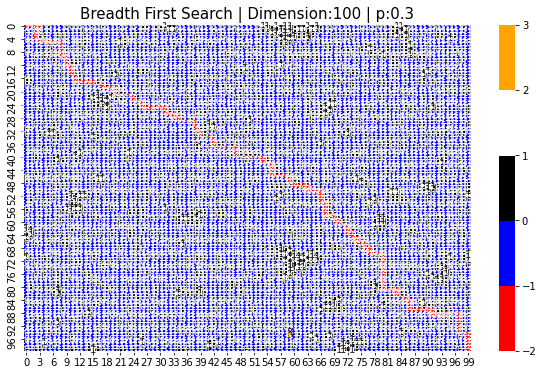

In [1627]:
maze,p = generate_maze(100, 0.3)
bfs = run_bfs(maze,p, show_fig= True)


In [16]:
# Trial on 1000 mazes to get sucess rate and changing flammability in bfs function
success=0

count=[]
for i in range(1,1001):
    maze,p = generate_maze(20, 0.3)
 
    bfs = run_bfs(maze,p, show_fig= False)
    
    count.append(bfs[0])
for i in range(len(count)):
    if count[i]==1 :
        success+=1
print(success/10)

50.2


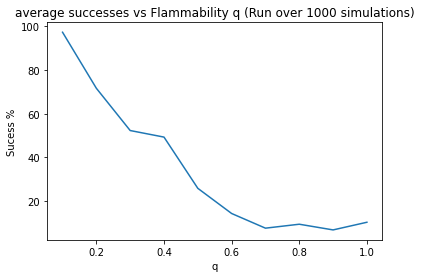

In [1614]:
#Plotting sucess rate vs q
df1 = pd.read_csv('successdata_bfs.csv')
df.head()
x= df1['Flammability']
y=df1['Success']
plt.plot(x,y)
plt.title('average successes vs Flammability q (Run over 1000 simulations)')
plt.xlabel('q')
plt.ylabel('Sucess %')
plt.show()

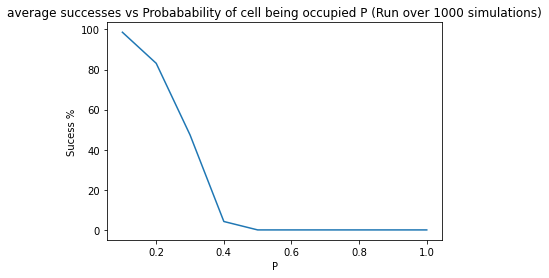

In [1287]:
#Plotting sucess rate vs P
df = pd.read_csv('sucessdata_bfs_p.csv')
df.head()
x= df['P']
y=df['Success']
plt.plot(x,y)
plt.title('average successes vs Probabability of cell being occupied P (Run over 1000 simulations)')
plt.xlabel('P')
plt.ylabel('Success %')
plt.show()

In [1429]:
#BFS for strat 2 

def run_bfs_strat2(maze,p,source1, show_fig=False):
        start = time.time()
        bfs_maze = maze.copy()
        queue = deque([])
        path = []
        visited = set()
        parent = {}
        curr_node = None
        max_fringe = 1
        source = source1
        goal = (bfs_maze.shape[0]-1, bfs_maze.shape[1]-1)
    
        queue.append(source)
        
    
        while len(queue):
            
            curr_node = queue.popleft()
            
            if curr_node not in visited and bfs_maze[curr_node]!=3:
                visited.add(curr_node)
                bfs_maze[curr_node] = -1
                
                
            
            if curr_node == goal and bfs_maze[curr_node]!=3:
                
                          
                time_taken = time.time() - start
                node = goal
                while node != source:
                  
                    path.insert(0,node)
               
                    if bfs_maze[node]==3:
                        bfs_maze[node]=6
                    else:
                        bfs_maze[node] = -3
                    
                    
                    node = parent[node]
                path.insert(0,source)
                bfs_maze[source] = -3
                
                if show_fig:
                    for i in range(len(maze)-1):
                        for j in range(len(maze)-1):
                            if bfs_maze[i][j]==6:
                                print("Path does not exist")
                                return 0
                    
                    print('Path exists')  
                    plot_search_maze(bfs_maze, 'Breadth First Search', p)
                
                return 1, visited, path
            
            neighbors = get_neighbors(bfs_maze, curr_node, visited)
            for neighbor in neighbors:
                if neighbor not in parent and bfs_maze[neighbor]!=3 :
                    
                    
                    parent[neighbor] = curr_node
                    queue.append(neighbor)          
               
            if max_fringe < len(queue):
                max_fringe = len(queue)
                
        if show_fig:
            print('Path does not exist')
        time_taken = time.time() - start
        return 0, visited, []

In [1534]:
#running stratergy 2 over 100 runs
source1=(0,0)
count=[]
tot=0
success=0
lenfromsource = []
for i in range(1,101):
    
    maze,p = generate_maze(20, 0.3)
    bfs = run_bfs(maze,p,show_fig=False)
    new_sources=bfs[2] #nodes in path to goal (will be using as source each time we run bfs_strat2)
    for x in new_sources:
        source1 = x
        bfs_maze = fire_update(maze,0.8)#each time we progresss we update the fire
        bfs1 = run_bfs_strat2(bfs_maze,p,source1,show_fig= False)
        count.append(bfs1[0])
        lenfromsource.append(len(source1))
x=sum(lenfromsource)
for i in range(len(count)):
    if count[i]==1:
        success= success+1
sucess_rate= (success/(x+1))*100
print(sucess_rate)

12.935323383084576


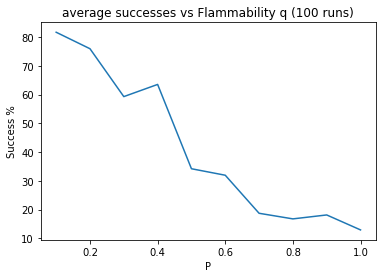

In [1613]:
#Plotting sucess rate vs q
df2 = pd.read_csv('successdata_strat2.csv')
#df.head()
x= df2['Flammability']
y=df2['Success']
plt.plot(x,y)
plt.title('average successes vs Flammability q (100 runs)')
plt.xlabel('P')
plt.ylabel('Success %')
plt.show()

In [1652]:
#Strat3 using A* and manhattan distance, I used manhattan because our movement is perdendicular directions only 
#so it would give us an edge
def manhattan_heuristic(dimension):
    H = np.zeros((dimension, dimension))
    goal = (dimension-1, dimension-1)
    for i in range(dimension):
        for j in range(dimension):
            H[i,j] = cityblock((i,j), goal)
               
    return H
    
def run_A_star_start3(maze, heuristic, p, show_fig=False):
    start = time.time()
    A_star_maze = maze.copy()
    queue = []
    path = []
    visited = set()
    parent = {}
    curr_node = None
    max_fringe = 1
    source = (0,0)
    goal = (A_star_maze.shape[0]-1, A_star_maze.shape[1]-1)

    if heuristic == 'manhattan':

        H = manhattan_heuristic(maze.shape[0])


    heappush(queue, (H[source],0, source))

    while len(queue):
           
        total_cost, cost_to_source, curr_node = heappop(queue)
        if curr_node not in visited:
            visited.add(curr_node)
            A_star_maze[curr_node] = -1
        if curr_node == goal:
                time_taken = time.time() - start
                node = goal
                while node != source:
                    A_star_maze=fire_update(A_star_maze,0.3)
                    path.insert(0,node)
                    if A_star_maze[node]==3:
                        A_star_maze[node]=6
                    else:
                        A_star_maze[node] = -2
                   
                    node = parent[node]
                path.insert(0,source)
                #A_star_maze[source] = -2
              
                if show_fig:
                    for i in range(len(maze)-1):
                        for j in range(len(maze)-1):
                            if A_star_maze[i][j]==6:
                                print("Path does not exist")
                                return 0
                    print('Path exists')
                    plot_search_maze(A_star_maze, 'A-star '+heuristic, p)
                    
                return 1, visited, path, time_taken
            
        neighbors = get_neighbors(A_star_maze, curr_node, visited)
        if len(neighbors):
            cost_to_source += 1
            for neighbor in neighbors :
                if neighbor not in parent and A_star_maze[neighbor]!=3 and A_star_maze[neighbor]!=0:
                    parent[neighbor] = curr_node
                    heappush(queue, (H[neighbor]+cost_to_source, cost_to_source, neighbor))
          
        if max_fringe < len(queue):
            max_fringe = len(queue)
                
    if show_fig:
        print('Path does not exist')
    time_taken = time.time() - start
    return 0, visited, [], time_taken

In [1596]:
#running stratergy 3 over 100 runs
success=0

count=[]
for i in range(1,101):
    maze, prob = generate_maze(20,0.2,show_fig=False)
    A_star = run_A_star(maze, 'manhattan', prob, show_fig=False)
    
    count.append(A_star[0])

for i in range(len(count)):
    if count[i]==1 :
        success+=1
print(success,success/100)

86 0.86


Path exists


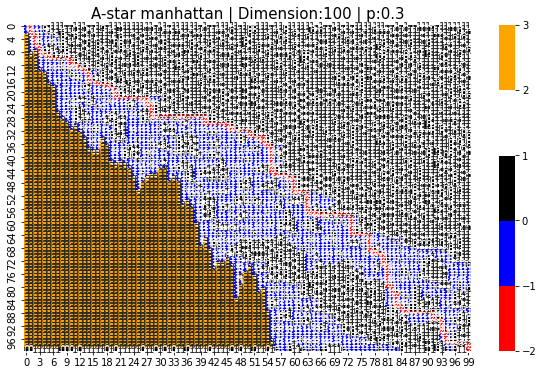

In [1672]:
maze, prob = generate_maze(1500,0.3,show_fig=False)
A_star = run_A_star(maze, 'manhattan', prob, show_fig=True)

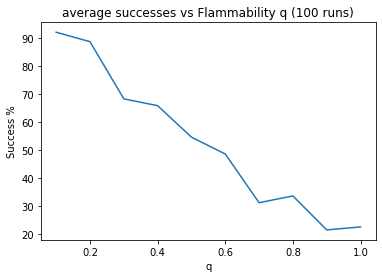

In [1612]:
#Plotting sucess rate vs q
df3 = pd.read_csv('successdata_strat3.csv')
#df.head()
x= df3['Flammability']
y=df3['Success']
plt.plot(x,y)
plt.title('average successes vs Flammability q (100 runs)')
plt.xlabel('q')
plt.ylabel('Success %')
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data';

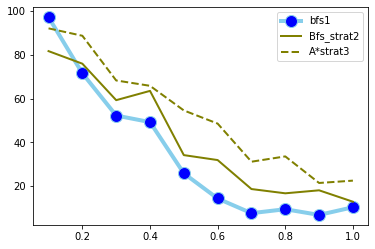

In [1624]:
#comparing the q vs sucess 
x1= df1['Flammability']
y1=df1['Success']
x2= df2['Flammability']
y2=df2['Success']
x2= df3['Flammability']
y3=df3['Success']

df=pd.DataFrame({'x': x1, 'y1': y1 , 'y2': y2, 'y3': y3})
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label="bfs1")
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2, label="Bfs_strat2")
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="A*strat3")
plt.legend()


In [1639]:
#calculating time for compuation for strat 1
t=[]
for d in tqdm([10, 50,100,200,300,400,500,1000,1500]):
    start = time.time()
    maze, p = generate_maze(d,0.2)
    bfs = run_bfs(maze,p,show_fig= False)
    time_taken = time.time() - start
    t.append(time_taken)
print(t)

 89%|████████▉ | 8/9 [42:20<05:17, 317.61s/it]


KeyboardInterrupt: 

In [1643]:
#calculating time for compuation for strat 3
tA=[]
for d in tqdm([10, 50,100,200,300,400,500,1000]):
    start = time.time()
    maze, prob = generate_maze(d,0.3,show_fig=False)
    A_star = run_A_star(maze, 'manhattan', prob, show_fig=False)
    time_taken = time.time() - start
    tA.append(time_taken)
print(tA)

100%|██████████| 7/7 [11:09<00:00, 95.59s/it] 

[0.027924537658691406, 0.7530176639556885, 6.11536431312561, 41.683945417404175, 230.10630702972412, 386.77769231796265, 3.6512198448181152]


In [1649]:
#calculating time for compuation for strat 2
t2=[]
for d in tqdm([10, 50,100,200,300,400,500,1000]):
    start = time.time()
    source1=(0,0)
    count=[]
    maze,p = generate_maze(d, 0.3)
    bfs = run_bfs(maze,p,show_fig=False)
    new_sources=bfs[2] #nodes in path to goal (will be using as source each time we run bfs_strat2)
    for x in new_sources:
        source1 = x
        bfs_maze = fire_update(maze,0.8)#each time we progresss we update the fire
        bfs1 = run_bfs_strat2(bfs_maze,p,source1,show_fig= False)
    time_taken = time.time() - start
    t2.append(time_taken)      
print(t2)

100%|██████████| 7/7 [15:42<00:00, 134.60s/it]

[0.013130664825439453, 1.170900821685791, 8.28887391090393, 77.7760374546051, 248.70536851882935, 606.1554141044617, 0.11968016624450684]


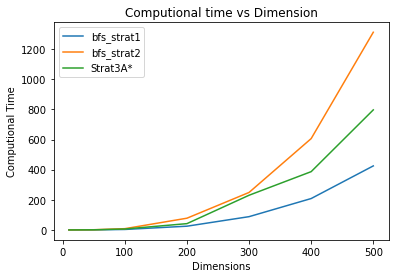

In [1669]:
#plotting Dimension vs time
df4 = pd.read_csv('dimension_and_time_analysis.csv')
x= df4['Dimension']
y1=df4['bfs_strat1']
y2=df4['bfs_strat2']
y3=df4['Strat3A*']
plt.plot(x, y1, label = "bfs_strat1")
plt.plot(x, y2, label = "bfs_strat2")
plt.plot(x, y3, label = "Strat3A*")
plt.xlabel('Dimensions')
plt.ylabel('Computional Time')
plt.title('Computional time vs Dimension')
plt.legend()
plt.show()